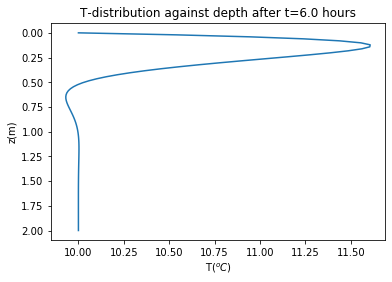

AttributeError: 'function' object has no attribute 'savefig'

In [5]:
# heatpen_osc
# Calculating daily or yearly heat penetration into the ground
# 
# Earth Structure and Dynamics 2021, week 1, question 4
# Jeroen van Hunen, 20200426

import numpy as np
import matplotlib.pyplot as plt

# Initialisation of the parameters:
T0     = 10            # Average surface temperature
dT     = 5             # Temperature fluctuation
kappa  = 1e-6          # Thermal diffusivity
tau    = 24*60*60      # period of oscillation (1 day)
zmax   = 2             # Max depth to calculate/plot
nz     = 100           # number of depth for plotting
tmax   = 24*60*60      # Max depth to calculate/plot 
nt     = 24            # number of timesteps for plotting
tplot  = 6*60*60       # time of snapshot for plotting (in sec)
zplot  = 0.5           # depth for plot (in m)

omega  = 2*np.pi/tau
z      = np.linspace(0,zmax,nz)       # create depth array
t      = np.linspace(0,tmax,nt)       # create depth array

# plot of T against z for one specific time step:
zphase = z*np.sqrt(omega/(2*kappa))   # pre-calc z phase delay
Tz     = T0 + dT*np.exp(-zphase)*np.cos(omega*tplot-zphase) 

# plot of T against time for one specific depth:
zphase = zplot*np.sqrt(omega/(2*kappa))   # pre-calc z phase delay
Tt     = T0 + dT*np.exp(-zphase)*np.cos(omega*t-zphase) 

# Plot z-solution:
plt.clf()
plt.figure(1)
plt.plot (Tz,z,'-')
plt.xlabel('T$(^oC)$')
plt.ylabel('z(m)')
plt.title('T-distribution against depth after t=%1.1f hours' %(tplot/60/60))
ax=plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
plt.show()
plt.savefig('solar_heat_Tz.png')

# Plot t-solution:
plt.figure(2)
plt.plot (t,Tt,'-')
plt.xlabel('t(sec)')
plt.ylabel('T$(^oC)$')
plt.title('T-distribution in time at z=%1.1f m' %zplot)
plt.show()
plt.savefig('solar_heat_Tt.png')